In [26]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import json
import os
import urllib.request

searchkey = '도봉산 신선대'
url = "http://www.google.com/search?q=" + searchkey + "&source=lnms&tbm=isch"

# chrome webdriver 실행
browser = webdriver.Chrome('./chromedriver')
browser.get(url)

In [27]:
# User-Agent를 통해 봇이 아닌 유저정보라는 것을 위해 사용
header = {'User-Agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36"}

# 이미지 카운트 (이미지 저장할 때 사용하기 위해서)
cnt = 0
sucnt = 0

# 이미지 저장 경로 생성
print(os.path)
if not os.path.exists('./data/' + searchkey):
    os.mkdir('./data/' + searchkey)
    
# 스크롤
for _ in range(500):
    browser.execute_script("window.scrollBy(0, 10000)")

<module 'ntpath' from 'C:\\Users\\Bom April Kim\\.conda\\envs\\hiking\\lib\\ntpath.py'>


In [28]:
# div 태그에서 class name이 rg_i인 것 찾기
elements = browser.find_elements_by_class_name('rg_i')

''
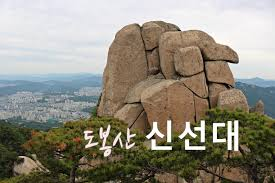

In [29]:
elements[0].get_property('src')

In [30]:
cnt = 0
for x in elements:
    urllib.request.urlretrieve(x.get_property('src'), './data/'+searchkey+'/'+str(cnt)+'.jpg')
    cnt+=1

ValueError: unknown url type: ''

In [31]:
print(cnt, "images successfully downloaded")
browser.close()

66 images successfully downloaded


In [11]:
for x in elements:
    cnt = cnt + 1
    print("Total : ", cnt)
    print("Success: ", sucnt)
    print("URL: ", json.loads(x.get_attribute('innerHTML'))["ou"])
    
    # 이미지 url - 구글 이미지 rg_meta의 속성에서 ou는 url]
    img = json.loads(x.get_attribute('innerHTML'))["ou"]
    # 이미지 확장자 - ity 속성은 확장자
    imgtype = json.loads(x.get_attribute('innerHTML'))["ity"]
    
    # 이미지 읽어서 저장
    try:
        req = urllib.request(img, headers = {'User-Agent':header})
        raw_img = urllib.request.urlopen(req).read()
        File = open(os.path.join(searchkey, searchkey + "_" + str(cnt) + "." + img_type), "wb")
        File.write(raw_img)
        File.close()
        sucnt = sucnt + 1
    except:
        print("can't get images")

Total :  1
Success:  0


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [2]:
# div 태그에서 class name이 rg_meta인 것 찾기
print("Start")

elements = browser.find_elements_by_class_name('rg_i')

print(len(elements))

for x in elements:
    cnt = cnt + 1
    print("Total : ", cnt)
    print("Success: ", sucnt)
    print("URL: ", json.loads(x.get_attribute('innerHTML'))["ou"])
    
    # 이미지 url - 구글 이미지 rg_meta의 속성에서 ou는 url]
    img = json.loads(x.get_attribute('innerHTML'))["ou"]
    # 이미지 확장자 - ity 속성은 확장자
    imgtype = json.loads(x.get_attribute('innerHTML'))["ity"]
    
    # 이미지 읽어서 저장
    try:
        req = urllib.request(img, headers = {'User-Agent':header})
        raw_img = urllib.request.urlopen(req).read()
        File = open(os.path.join(searchkey, searchkey + "_" + str(cnt) + "." + img_type), "wb")
        File.write(raw_img)
        File.close()
        sucnt = sucnt + 1
    except:
        print("can't get images")

Start
0


0 images successfully downloaded
